In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

In [2]:
file1 = 'data-4275-2021-02-09.xlsx' 

df = pd.read_excel(file1) 
df.head(15)

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geoData
0,151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",(499) 183-14-10,48,нет,37.714565,55.879002,"{type=Point, coordinates=[37.71456500043604, 5..."
1,77874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",(495) 676-55-35,35,нет,37.673306,55.738239,"{type=Point, coordinates=[37.6733061300344, 55..."
2,24309,Кафе «Академия»,637376349,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, Абельмановская улица, дом 6",(495) 662-30-10,95,нет,37.669648,55.735511,"{type=Point, coordinates=[37.6696475969381, 55..."
3,27429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",(499) 908-06-15,240,нет,37.566940,55.904019,"{type=Point, coordinates=[37.56694, 55.9040188..."
4,148815,Брусника,637376481,да,Брусника,кафе,Центральный административный округ,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2",(495) 697-04-89,10,нет,37.598128,55.747390,"{type=Point, coordinates=[37.59812754843999, 5..."
5,20957,Буфет МТУСИ,637376500,нет,NaN,столовая,Юго-Восточный административный округ,район Лефортово,"город Москва, Авиамоторная улица, дом 8, строе...",(495) 673-89-78,90,нет,37.715425,55.755164,"{type=Point, coordinates=[37.71542539189803, 5..."
6,28858,Столовая МТУСИ,637376536,нет,NaN,столовая,Юго-Восточный административный округ,район Лефортово,"город Москва, Авиамоторная улица, дом 8, строе...",(495) 273-89-78,120,нет,37.715425,55.755164,"{type=Point, coordinates=[37.71542539189803, 5..."
7,23394,Кафе Гогиели,637376678,нет,NaN,кафе,Юго-Восточный административный округ,район Лефортово,"город Москва, Авиамоторная улица, дом 49/1",(495) 361-38-50,24,нет,37.719950,55.749276,"{type=Point, coordinates=[37.71995037885907, 5..."
8,22579,Алло Пицца,637376719,да,Алло Пицца,кафе,Новомосковский административный округ,поселение Щербинка,"город Москва, улица Авиаторов, дом 14",(495) 934-31-00,32,нет,37.533281,55.514011,"{type=Point, coordinates=[37.53328086209287, 5..."
9,23670,Гимназия 1542,637376788,нет,NaN,столовая,Новомосковский административный округ,поселение Щербинка,"город Москва, улица Авиаторов, дом 16",(495) 934-87-32,270,нет,37.533839,55.513613,"{type=Point, coordinates=[37.53383918241649, 5..."


# Stacked Area Chart

## Распределение количества мест в заведениях общественного питания по типам объектов и административным округам Москвы

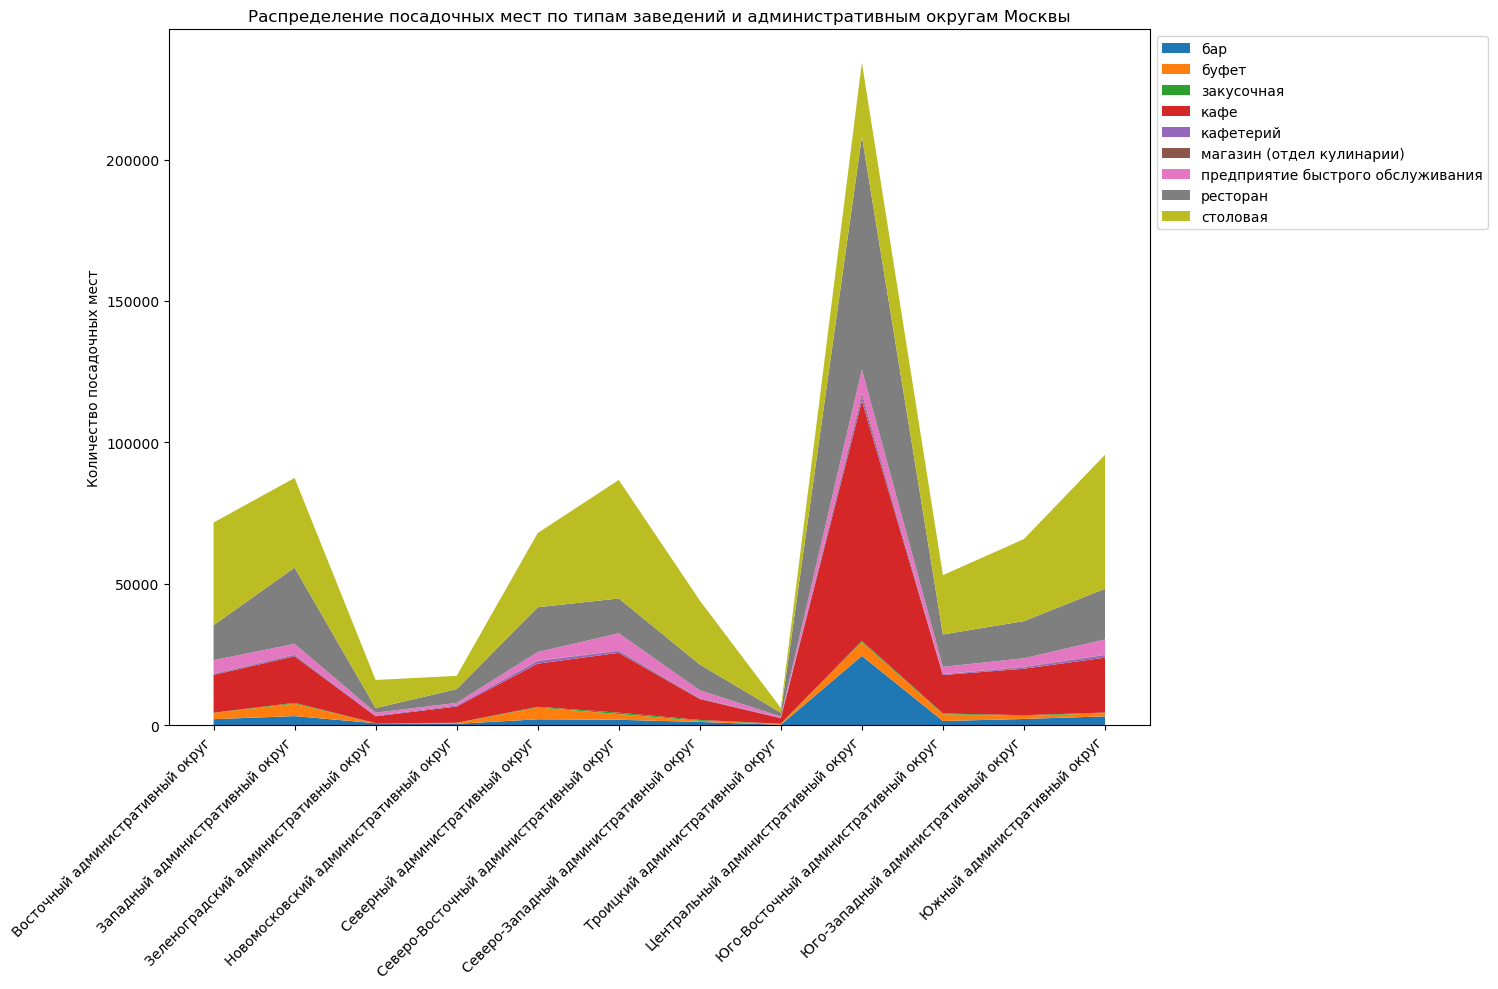

In [3]:
agg = df.groupby(['AdmArea', 'TypeObject'], as_index=False)['SeatsCount'].sum()

# Создание сводной таблицы
pivot = agg.pivot(index='AdmArea', columns='TypeObject', values='SeatsCount').fillna(0)

x_labels = pivot.index.tolist()          # Административные округа
x = range(len(x_labels))                # Числовая ось (0, 1, 2, ...)
y_stacks = pivot.values.T               # Транспонируем

fig, ax = plt.subplots(figsize=(15, 10))

ax.stackplot(x, y_stacks, labels=pivot.columns)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_ylabel('Количество посадочных мест')
ax.set_title('Распределение посадочных мест по типам заведений и административным округам Москвы')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## Нарисуйте 3 уровня лестницы с помощью Stacked Area Chart различными цветами, добавьте лейблы и название графика

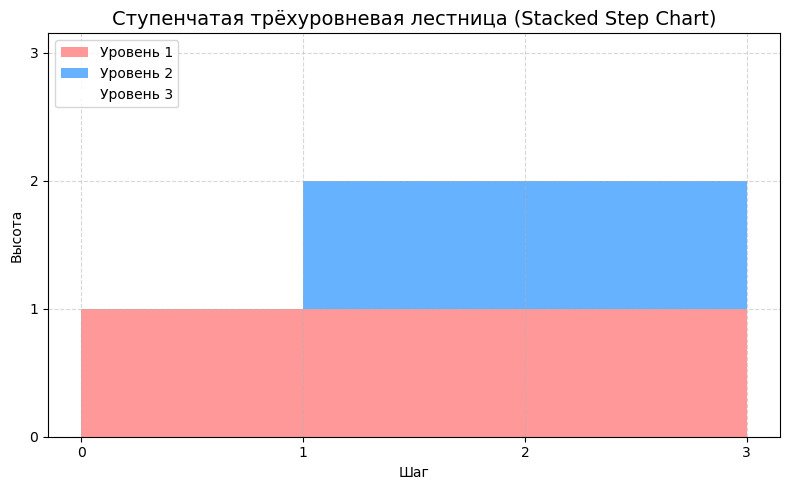

In [14]:
import matplotlib.pyplot as plt

# Исходные данные
x = [0, 1, 2, 3]
y1 = [1, 1, 1, 1]  # Уровень 1
y2 = [0, 1, 1, 1]  # Уровень 2
y3 = [0, 0, 1, 1]  # Уровень 3

# Собираем уровни в список для stackplot
y = [y1, y2, y3]

# Цвета
colors = ['#FF9999', '#66B2FF', '#ffffff']

# Строим стековый ступенчатый график
fig, ax = plt.subplots(figsize=(8, 5))
ax.stackplot(x, y, labels=['Уровень 1', 'Уровень 2', 'Уровень 3'],
             colors=colors, step='post', baseline='zero')

# Настройки
ax.set_title('Ступенчатая трёхуровневая лестница (Stacked Step Chart)', fontsize=14)
ax.set_xlabel('Шаг')
ax.set_ylabel('Высота')
ax.set_xticks(x)
ax.set_yticks([0, 1, 2, 3])
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Bar Chart

## Cтолбчатую диаграмму, показывающая количество заведений по типам в Центральном административном округе (ЦАО)

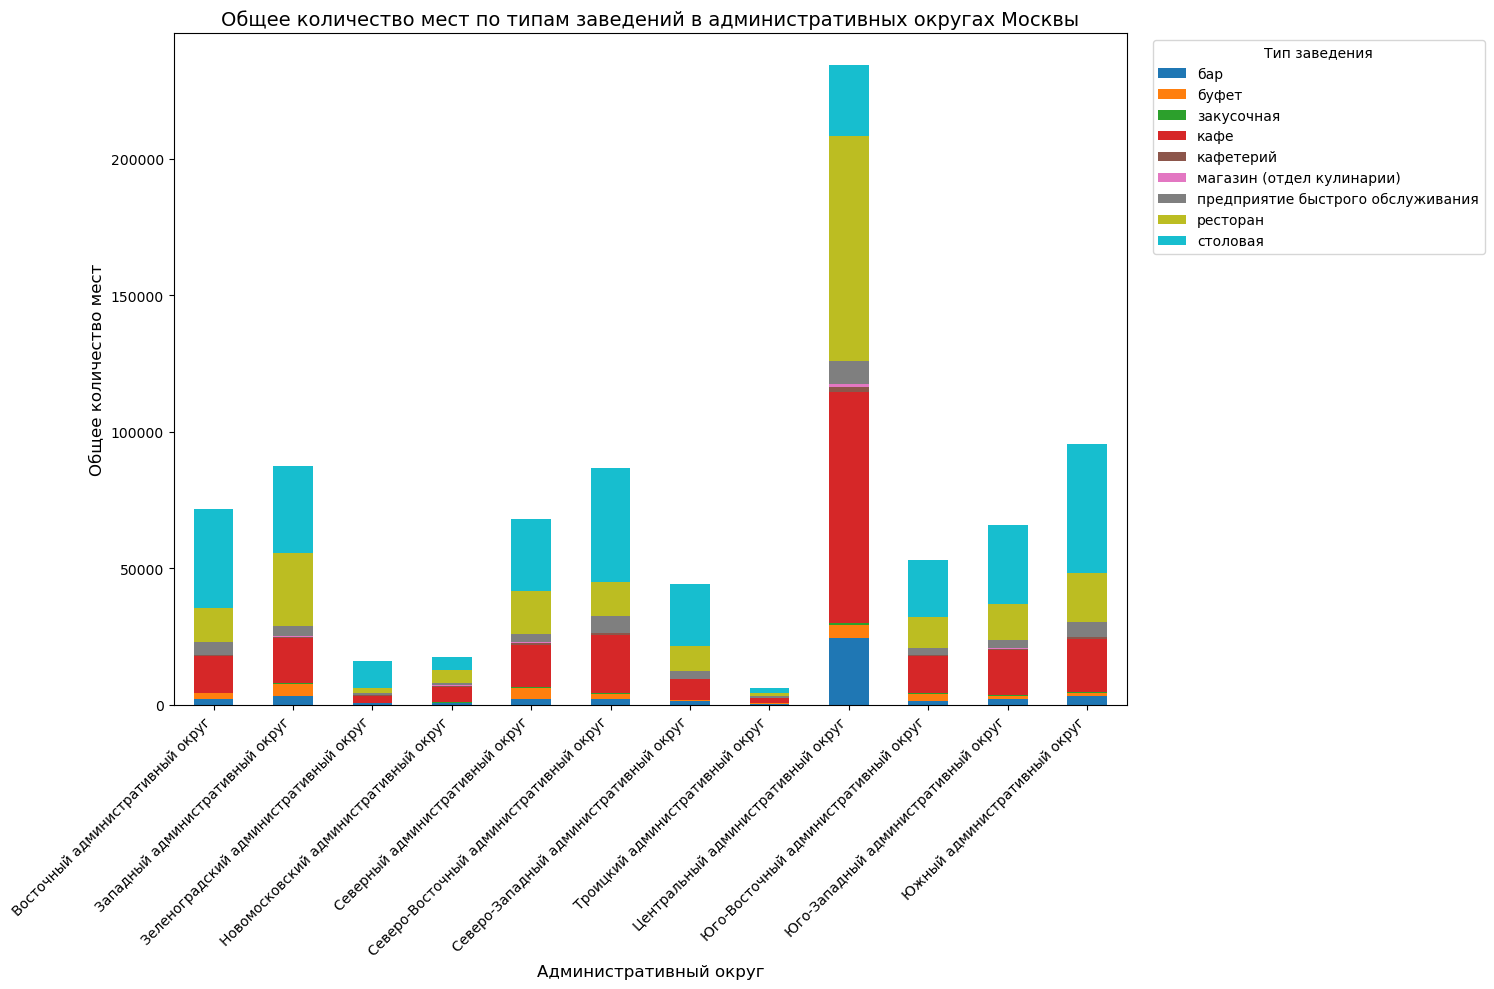

In [22]:
pivot = df.groupby(['AdmArea', 'TypeObject'])['SeatsCount'].sum().unstack(fill_value=0)

# Построение стекированной столбчатой диаграммы
fig, ax = plt.subplots(figsize=(15, 10))
pivot.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

# Настройки графика
ax.set_title('Общее количество мест по типам заведений в административных округах Москвы', fontsize=14)
ax.set_xlabel('Административный округ', fontsize=12)
ax.set_ylabel('Общее количество мест', fontsize=12)
ax.legend(title='Тип заведения', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Горизонтальная столбчатая диаграмма, отображающая топ-10 районов по количеству баров

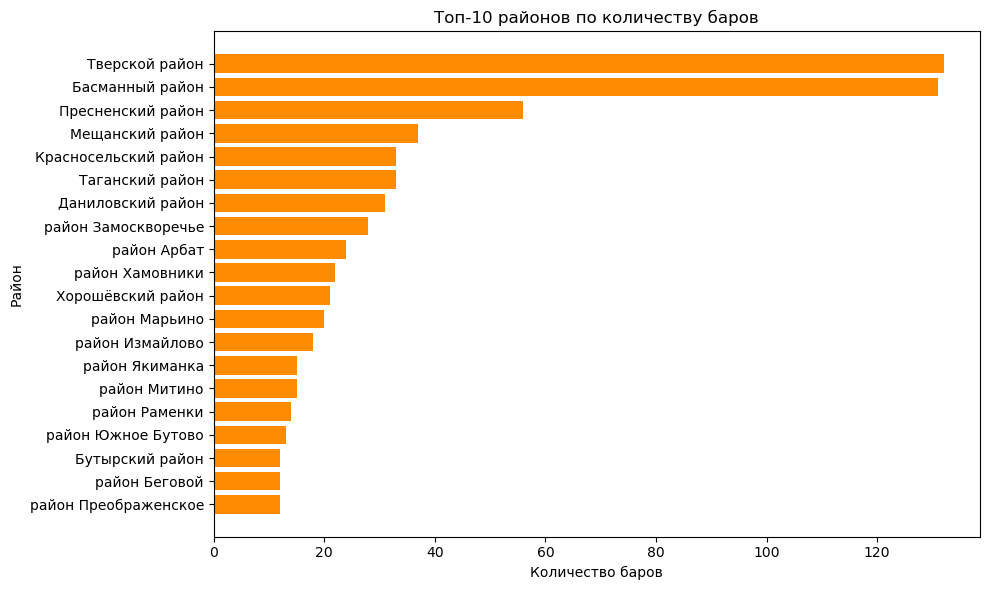

In [7]:
bars_data = df[df['TypeObject'] == 'бар']
district_bar_counts = bars_data['District'].value_counts().head(20)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(district_bar_counts.index, district_bar_counts.values, color='darkorange')
ax.set_title('Топ-10 районов по количеству баров')
ax.set_xlabel('Количество баров')
ax.set_ylabel('Район')
ax.invert_yaxis()  # Чтобы самый популярный район был сверху
plt.tight_layout()
plt.show()

# Histogram

## Гистограмму распределения количества посадочных мест в заведениях Восточного административного округа

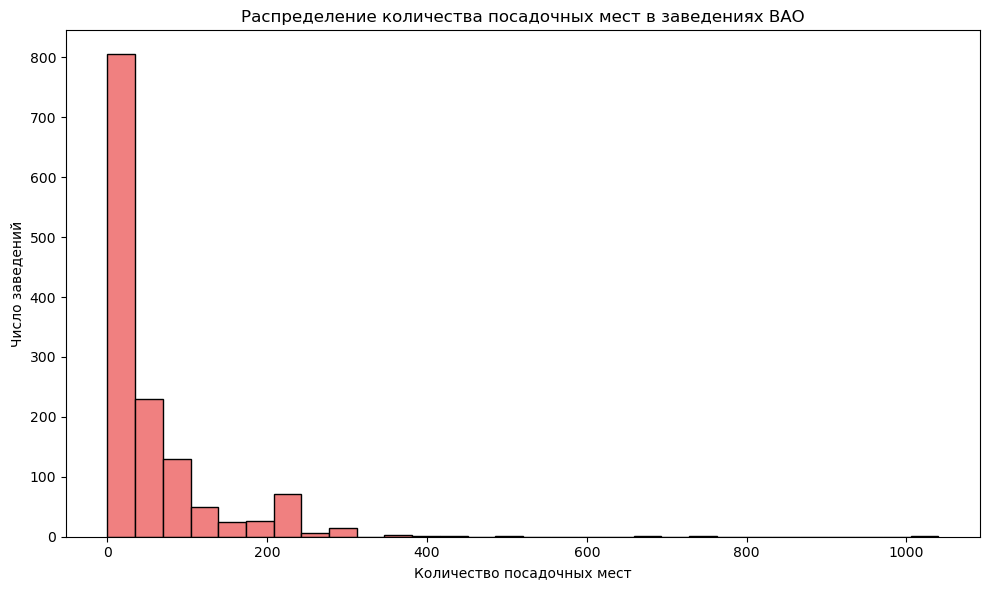

In [8]:
vot_okr = df[df['AdmArea'] == 'Восточный административный округ']
seats = vot_okr['SeatsCount'].dropna()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(seats, bins=30, color='lightcoral', edgecolor='black')
ax.set_title('Распределение количества посадочных мест в заведениях ВАО')
ax.set_xlabel('Количество посадочных мест')
ax.set_ylabel('Число заведений')
plt.tight_layout()
plt.show()

## Гистограмма распределения долготы для всех заведений для визуализации географическую плотности размещения объектовот с запада на восток

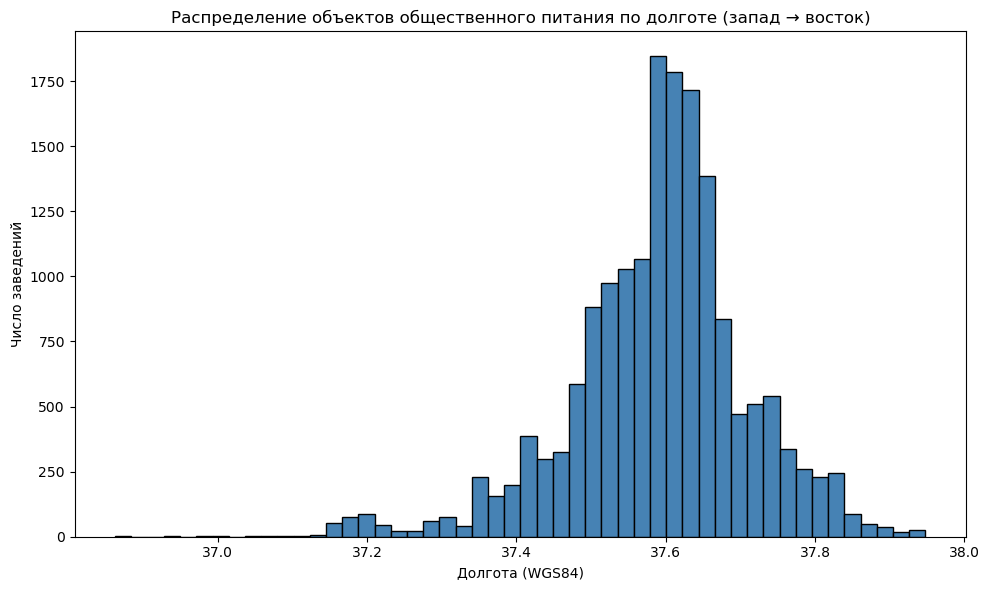

In [41]:
longitude = df['Longitude_WGS84'].dropna()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(longitude, bins=50, color='steelblue', edgecolor='black')
ax.set_title('Распределение объектов общественного питания по долготе (запад → восток)')
ax.set_xlabel('Долгота (WGS84)')
ax.set_ylabel('Число заведений')
plt.tight_layout()
plt.show()

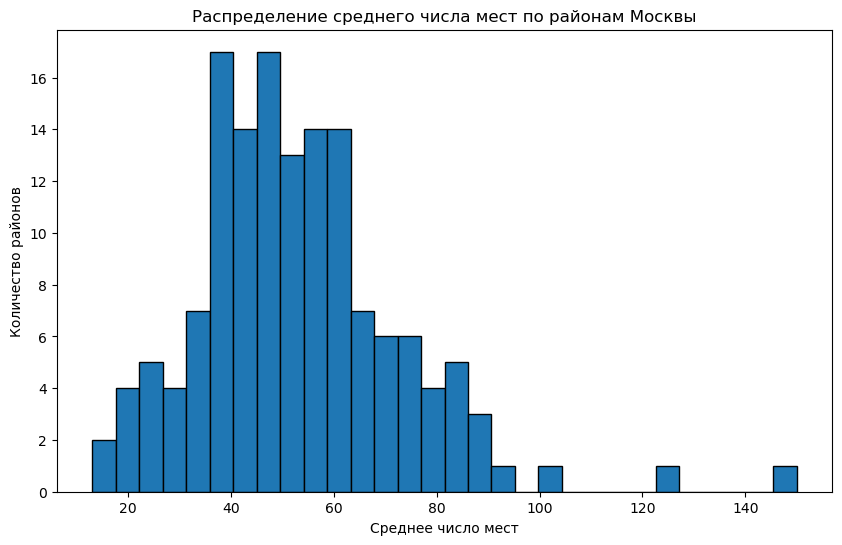

In [68]:
mean_seats = df.groupby('District')['SeatsCount'].mean()

mean_seats.hist(bins=30, edgecolor='black', figsize=(10, 6))
plt.xlabel('Среднее число мест')
plt.ylabel('Количество районов')
plt.title('Распределение среднего числа мест по районам Москвы')
plt.grid(False)
plt.show()

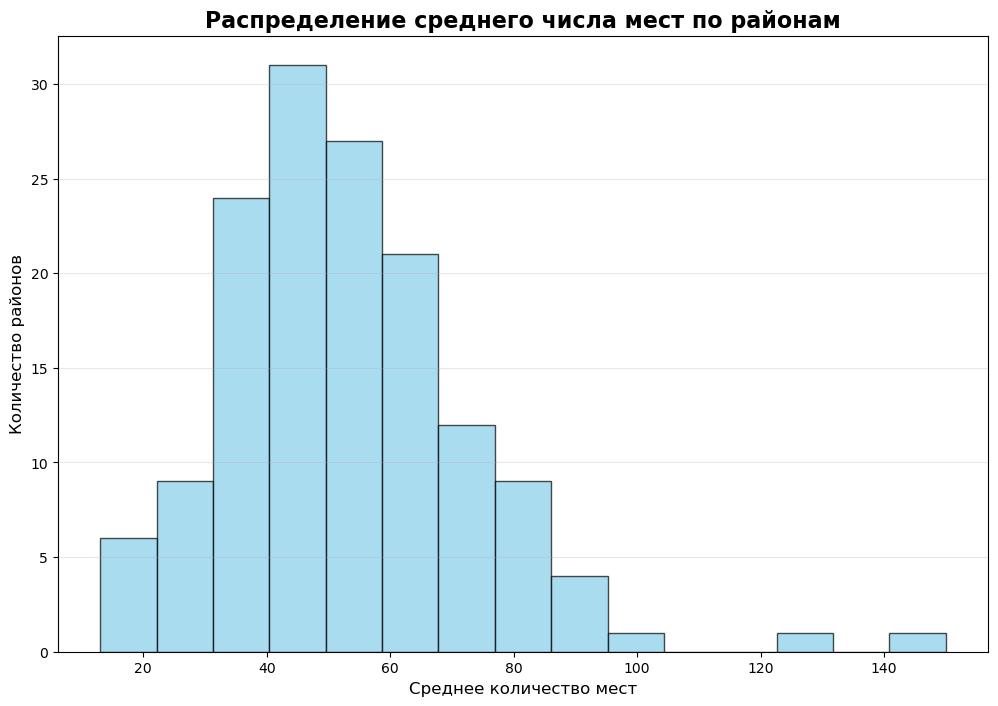

In [65]:
district_seats_avg = df.groupby('District')['SeatsCount'].mean()

# Строим гистограмму
plt.figure(figsize=(12, 8))
plt.hist(district_seats_avg, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Распределение среднего числа мест по районам', fontsize=16, fontweight='bold')
plt.xlabel('Среднее количество мест', fontsize=12)
plt.ylabel('Количество районов', fontsize=12)
plt.grid(axis='y', alpha=0.3)